# Class 12 - 8.6.20

# Git and More Python Libraries

## Git

When we started using git, the basic intro I gave came down essentially to this:

![Git, from xkcd 1597](extra_material/git.png)

I did try to explain a little why we use it and how, but I essentially forced it upon you and made you memorize a few commands for it to work, and for your HW to be correctly submitted. Today we'll try to dive a bit deeper and understand the "how" of git. This is because git is an immensely useful tool for our type of work, and it will be even more useful when we start hacking together in a few weeks time. 

### Why git?

Version controlling software lets us:
1. Write and manage the history of our codebase.
2. Work on changes for our code without modifying the currently working copy.
3. Collaborate with others easily.

Reason #1 is important enough as is, but the other two really makes git shine above the rest of the options out there, and it's also what made it so popular in the open source community.

There are a [variety](https://www.daolf.com/posts/git-series-part-1/) [of](https://missing.csail.mit.edu/2020/version-control/) [tutorials](https://rachelcarmena.github.io/2018/12/12/how-to-teach-git.html) [on](https://smusamashah.github.io/explain-git-in-simple-words) [git](https://git-scm.com/doc). Some are also [interactive](https://learngitbranching.js.org/). The one below is aimed at working with VSCode's integrated tools, and should also help you collaborate during the hackathon.

### The model

![Git composition](extra_material/git_lifecycle.png)

In a version-controlled project we have these three basic components:
1. Repository - the name for the entire collection of version-controlled files. We can have a local repository, i.e. one in our computer, a remote one, i.e. one on the cloud (like GitHub provides) or both. A repository contains both the standard files we're working on, and a compressed copy of them inside the `.git` folder.
2. Working tree - the name given for the current state of the version-controlled folder, which might defer from the version that was previously captured and recorded. When the working tree is "clean" it means that there's no such difference between the latest "snapshot" of the codebase, as resides inside the `.git` folder, and the copy currently visible to the user.
3. Index - an intermediate "staging" environment, the only place from which code can be inserted into the repository. This allows us to change many things, but only commit parts of them into the repository itself.

The main idea behind git is to capture complete snapshots of the directory we're tracking. Yes, the snapshots include everything that was present at that directory during that point of time and they're complete, i.e. "decoding" them allows us to view the directory as it once was.

### Setting up a repository

Any directory can be a git directory if it contains a `.git` folder with the proper subfolders (automatically generated, of course). The easiest way to create such a folder is to use the `init` command. If you open a folder which isn't version controlled, VSCode will automatically offer to create a new git repository in it:

![Initialize a repo](extra_material/git_init.png)

If your directory is already version controlled, simply opening it in VSCode should work. If it's not working, make sure you used the "Open Folder..." command to open VSCode. The folder containing the `.git` folder is the "top level" of your repository, and will automatically notice any changes in the subfolders of that folder. It's usually not recommended to have several git projects inside a git-tracked folder. This means that if you have a "my_code_projects" folder which contains several other git-tracked folders, like HW assignments and other unrelated stuff, make sure that "my_code_projects" isn't a git folder in itself, i.e. you shouldn't have a `.git` folder in it. It's technically possible to have "independent" git repositories inside others (they're called sub-modules) but it's usually not the right way to organize your projects.

To conclude, once git is set the parent directory, as well as its sub-directories, will be tracked as long as there's a `.git` folder in it. To remove `git` tracking from that specific folder, all you have to do is to remove the `.git` subfolder.

### Commits

The act of committing a file is perhaps the most fundamental one in git, so let's break it down. When a file in a git-tracked folder has different contents from what the git repository has in it (remember that it has copies of everything) the file will be recognized by git as a "changed" file. In git terms, it means that the copy of the file in the "working tree" is different than what's in the repository. Of course, if we haven't committed anything, and only initialized the repository, __all__ files will have a different working copy than what git has in its repository, since git doesn't recognized any of them. Let's see how it looks like in VSCode:

![Working copy](extra_material/git_workcopy.png)

As you see, there are two options for this situation - either the file is completely new and doesn't exist in the repository, and so it's marked as "U" in git ("Untracked") or it already existed there, but the current content is different than the one recorded in the repository ("M" for "Modified").

From the chart above we see that we need to add the files to the index, before committing them to the repository. Adding to the index, also known as "staging", is done using the "git add" command, represented in VSCode with a "+" sign. We can either add all files to the index, or add one at a time.

![Add all](extra_material/git_add_all.png)
![Add one](extra_material/git_add_one.png)

The reason we might not add everything at once is that commits are used to convey messages, so if a file doesn't fit the message a commit is saying, we can commit it sometime else. Also, at any given point in time we can be confident about changes in one file, but less confident about changes in another. Changes we believe in can be committed without much doubt, but temporary edits may be left out.

Once files are staged they may be committed. Staged files have their own little dropdown area:

![Before committing](extra_material/git_staging.png)

The added file, marked with an "A", can be committed by writing a commit message which describes what has changed and then by clicking the tick mark. Hovering over it will show a `-` sign that allows us to unstage it.

Once committed the file will be "copied" to the git repository and saved there for future reference. We could go back in time to each commit quite easily using the "Timeline" feature on the bottom left of VSCode. Essentially commits are snapshots to the status of the repository at that particular instance. Each commit knows of its predecessor, so they form together a graph of progress for your repo. Due to these reasons it's suggested to commit a lot and often. It's very cheap to commit and it will provide you with a clear history of the changes in your repo. Changed a function's signature? Commit. Added documentation? Commit. You basically commit everytime you feel like you feel the need to save the file (even though VSCode does that automatically).

### Branches

Up to now we've discussed most of these things earlier this semester. Now we come to a very important feature of git that you (probably) haven't been using, but that should help you iterate over your own code, and cooperate with others.

Branches of repositories are different "working copies" of the same repository, which have a different commit history. Every git repo has at least one branch, usually called master, which signals to the coders that this branch is the main branch. This branch is but a label which is put to a commit - usually the last one - and says that this commit is the current "head" of the branch. The history of a branch is the history of the commits that came before the commit it's currently pointing at.

#### Use cases

Assume you're changing something in an existing codebase, but you're not exactly sure how will it pan out. Or you're making a change that in the long run you're certain will work, but it means that you have to "break" the current implementation, which will render the current codebase unusable until you're done. If you ever found yourself in one of these situations then you should have probably used a branch.

Branches let you not worry about changes you make, since you know you'll always be one command away from going back to the safe confounds of your older repo version, the one that worked.

#### Usage

Making new branches is easy, which is another incentive that makes git-based developers use it a lot. To make a new branch from VSCode, click "Checkout to.." and then choose "Create new branch...". Type in the name of the branch - the name of the feature or the bug you're fixing, usually - and press enter. You'll be checked out to that branch, which means that your current work will be committed to that branch instead of the previous one. You'll notice the name of the branch in the bottom left corner of your screen, next to the "fork" symbol.

### Remotes

A git repository can have many copies scattered around, and it's very popular to host your git repositories in the cloud for backup and collaboration purposes. The most popular service for this purpose is the Microsoft-owned GitHub.com (GH), which hosts the codebases of many of the larger companies - Google, Microsoft, NSA - as well as millions of tiny, private user-owned repositories.

Below we'll look in more detail at some of the basic actions one can do with these cloud-based repositoties, which are called _"remotes"_ in git lingo.

#### Setting up a remote repository

Before you can do anything with a remote repository, you first have to set it up. There a few options for that:

##### Create a repository directly in GitHub.com
This means that at the moment of its creation, the only copy of this repository which exists anywhere is on GH's cloud. Since we usually don't develop straight inside GH, we'll first need a copy of this repository on our computer, and to have a direct "link" between our local copy and the online copy.

Here's how you create an online repo:

In [5]:
from IPython.display import Video

Video('extra_material/github_online_first.mp4', width=800, height=600)

Here's how we download it - "clone" (the "Git: Clone" option window was opened using Ctrl + Shift + P):

In [6]:
Video('extra_material/github_clone.mp4', width=800, height=600)

We now have a local copy of the repo and we're ready to work.

##### Create a local repository and point it at an existing remote repo
If we already have a local repository which we now wish to back up online, we can connect it to some online repo using a few commands. It's usually better if the online repo is brand new and has the same name of the local repo. Here's an example (again, the "Git: Add Remote" was accessed using Ctrl + Shift + P):

In [8]:
Video('extra_material/github_from_local.mp4', width=800, height=600)

These two options are equally valid and both will eventually generate a repository both on your computer and on the cloud.

A repository can have several remotes it works with. In the example above I called the remote "origin", as is customary, but it's completely possible to add more remotes with different names and to push changes to them as well. Soon we'll go through an example where our local repo will have one more needed remote.

#### Push and pull

The most basic thing you can do with a remote repository is to pull data from it, or push to it. Pulling is done when we wish to sync with changes which are located on the cloud, but were uploaded there by someone else. In the hackathon, for example, it's possible that some other students will change the repo's file, and you'd like these changes to be inside your local copy as well - so you "pull" the changes from the cloud into your machine.

Pushing is exactly the opposite - you're publishing your work online for collaboration (or backup) purposes.

#### Conflicts

While conflicts may occur in any git repo, regardless of its remotes, they're most relevant under this situation so we'll go through them now. A conflict is a "disagreement" between two repos on the history of commits. In other words, two repos which are supposed to be identical have the same file but with different content. Please note that if your repository consists of `hello.txt` and the remote one consists of an identical copy of `hello.txt` and an extra `hi.txt` file, pulling it will not cause a conflict, since no harm will be done if we simply copy `hi.txt` to your own local copy. Here's an example:

In [9]:
Video('extra_material/github_pull_no_conf.mp4', width=800, height=600)

New files will be pulled without any issues. Even if someone changed an existing file you have, but you haven't made any changes to it - git will still happily update your own local copy:

In [10]:
Video('extra_material/github_pull_no_issue.mp4', width=800, height=600)

Conflics happen within existing files, when the remote and local copy have different copies of the same file, and both were edited. Let's look at an example:

In [14]:
Video('extra_material/github_conflict.mp4', width=800, height=600)

In this example you see that the remote copy was updated independently by some other author, and I worked on my own local copy disregarding existing changes in the remote copy. When I try to pull the latest updates from the remote, git will tell me that we have conflict since our file histories don't match. This conflict has to be resolved by deciding who wins, i.e. whose copy of `hi.txt` along with its history will keep on living in our repository.

The conflict is visualize with the green and blue part, showing the "current change" (my copy) and the "incoming change" (remote's work). Then I have to choose who's work will I keep? "Accept Current Change" means that my copy prevails, while "Accept Incoming Change" means that other guy's work will prevail. After I chose the preferred option the file is automatically edited and I can stage and commit this merge. Lastly I'm able to push back to the repo the conflict resolution, and indeed I see it online.

### Forks and Pull Requests

Forking in git is the act of taking a snapshot of a repository, and using it as a base for our own repository. The fork is "aware" that it was once a part of a different repository, but now it belongs to some other guy. When you fork a repo you're saying something like "I'll take it from here", since your future work on the codebase will be completely isolated from work that keeps happening in the repo that you forked from.

Forking is done when you wish to develop for a repository which you have no write permissions to, or when you wish to start a spin-off from some repo. For example, if I want to add a feature to `pandas` I can't simply clone that repository to my computer, write some code and then push it back since it's not my repo and I have no permissions. If anyone could push to any repo they cloned things would go crazy pretty fast. Instead, I'll fork that repo, work on that forked copy and when I wish to introduce this feature to the `pandas` devs I'll make a _Pull Request_ which showcases my changes. A pull request is a way to "connect" a fork to its origin repo; it's an event which happens in the original repo in which the developers see that someone forked their codebase, changed something and now wishes to merge it back. They can review this change, perhaps ask for more clarifications and then merge it if they deem it worthy. An example of a pull request can be seen [here](https://github.com/pandas-dev/pandas/pull/34631).

#### Usage

After forking a repository you receive its copy as a GH repo, and to do the actual coding work you need to clone it to your computer. This means that the local repository you'll have has two repos which with it can interact - your fork and the original repo. We usually call your own fork the "origin" (just like we do in regular clones) and the original repo is called "upstream". Let's see it in action:

In [15]:
Video('extra_material/github_fork.mp4', width=800, height=600)

Here we showed the first part of the process - forking a repository and cloning it to our computer. You can see that the forked repository has a "forked from HagaiHargil/localrepo" header (around 0:24), which reminds you constantly of its upstream repo.

Here's how you create a pull request after editing something in your own local copy:

In [16]:
Video('extra_material/github_pr.mp4', width=800, height=600)

The last thing we might want to do is to update our local copy with the changes from the upstream repo, i.e. the original repo that we forked. We'll do that whenever the original developers added new features which we also want in our own local copy, for example. To do that, we'll add that original repo as an "upstream" remote in our own repo, and then we could pull from there. Here's an example:

In [17]:
Video('extra_material/github_upstream.mp4', width=800, height=600)

As you noticed, after adding the remote (Ctrl + Shift + P) you still need to "fetch" the information from it, as it doesn't happen automatically. Only after fetching, which is done once, you can pull from the upstream repo.

There are a few other useful features of git, but we'll stop here.

# Important Python Libraries Which Weren't Mentioned

The vastness of the Pythonic ocean can be overwhelming, but fortunately I'm (still) here to help. I'd like to mention a few other libraries which weren't mentioned yet in the course.

### [Dask](https://dask.org/)

Dask is a library for parallel computation on larger-than-memory datasets. It wraps many of the common data structures we've learned to love like lists, arrays and data frames and provides very similar APIs, but which scale to many cores and GPUs automatically.

Dask offers both these core data structures, and a pipelining mechanism to control the execution of the computations that are done on the data.

Happily I don't even need to tell you how do these "new" data structures work, since they're not even new per se - they're copies of existing ones:

In [ ]:
# The file doesn't exist, but that's not the point
import dask.dataframe as dd
df = dd.read_csv('2015-*-*.csv')
result = df.groupby(df.user_id).value.mean().compute()

The only difference is the `.compute()` method at the end. We call it once we specified all computations that were supposed to happen on the object, and only when we call it they're actually made. Before `compute()`ing, Dask create a graph which consists of all the functions we specified, checks which one can be done in parallel and then it executes them in the most efficient way possible.

#### Dask.Futures

To run our entire pipeline in parallel, we can use the `Futures` module of Dask to have thread- or process-based parallelism. Asssuming we have several functions which have to be called in a row, with a few that can be parallelized, we can write all functions and then call them in this manner:

In [21]:
from dask.distributed import Client

client = Client()  # start local workers as processes
# or
# client = Client(processes=False)  # start local workers as threads

def inc(x):
    return x + 1

def add(x, y):
    return x + y

a = client.submit(inc, 10)  # calls inc(10) in background thread or process
b = client.submit(inc, 20)  # calls inc(20) in background thread or process
x = client.submit(add, *(a.result(), b.result()))
a

/home/hagai/miniconda3/envs/course/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


<Future: pending, key: inc-e97cb013a44ba034f8031642c0c61518>

In [22]:
# To "block", i.e. to force the code to execute up to now, we call result()
res = a.result()
res

11

We don't need to wait for the results to arrive, we can assume they arrived and call the next function in line without callin `result()`:

In [24]:
c = client.submit(add, a, b)  # calls add on the results of a and 
c.result()

32

A Dask-based pipeline is a series of `submit()`s followed by a `result()`. The other ways to interact with this pipeline are described in the [docs](https://docs.dask.org/en/latest/futures.html).

### [Streamz](https://streamz.readthedocs.io/en/latest/index.html)

Streamz is a handy library to work with streaming data, i.e. real time data. If you run live experiments and you need to read, process and output something immediately, then you're probably better off with a library that helps you with the small details of handling the incoming bytestream.

Streamz integrates flawlessly with pandas, numpy and the likes, but let's look at a simpler example:

In [3]:
from streamz import Stream

def increment(x):
    return x + 1

source = Stream()
source.map(increment).sink(print)

source.emit(1)
source.emit(10)

2
11


We initialized a `Stream` instance which has two main components:
1. It takes in the different functions that wil process the data in steps;
2. and it takes the inputs (inside the `emit()` method) that will be processed.

This was a pretty simple stream - let's look at something with "branching":

20


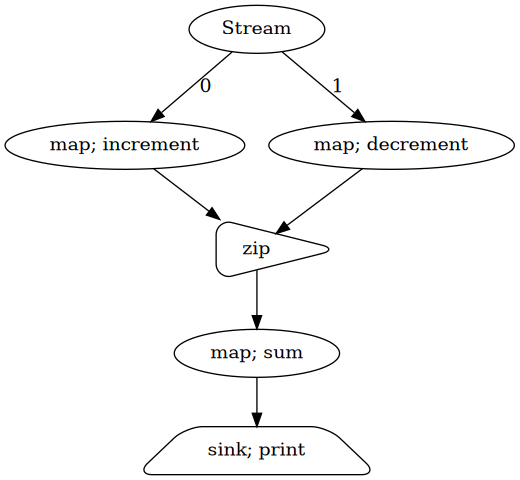

In [7]:
def decrement(x):
    return x - 1

source = Stream()
a = source.map(increment)
b = source.map(decrement)
c = a.zip(b).map(sum).sink(print)
source.emit(10)  # 9 + 11
source.visualize()

Streamz can do a whole lot of other things, including feedback, recursion and time-based processing.

### fMRI Processing

If you're passionate about fMRI and DTI studies, then you'll be happy to learn that Python has [`nipy`](https://nipy.org/) to offer. It's a collections of open source tools that can help with all stages of your fMRI study, including complex analysis pipelines and integration with third party tools like FSL. 

### CUDA Ecosystem

The graphical processing unit, or GPU, is a "special" processor inside your computer that is able to perform simple tasks very quickly. It's very bad at replacing a standard computational processing unit (CPU), but it can add numbers really fast - much faster than the CPU - which can be very useful sometimes. A long time ago GPUs were only useful for the gaming industry, but since the rise of ML GPUs became super important and widespread, and today they can be found in most computers and servers. Using these GPUs effectively can speed up some computational pipelines by orders of magnitude.

CUDA is a framework by nVidia, the largest GPU manufacturer, that assists in the integration of the GPU into your code. We won't go into too much detail here but code that should be run on the GPU has to be compiled for that specific GPU beforehand, so something needs to do that work for us. CUDA helps in this regard, and once it's installed on your machine it will be much easier to work effectively with your card.

From the wide CUDA ecosystem you probably should know that `numba` can compile your code to use the GPU instead of the CPU, and that two other nVidia-based libraries can help you with other day to day tasks:

1. [CuPy](https://cupy.chainer.org/) - the `numpy` replacement. It's designed so that you could replace your `np.array` calls with `cupy.array` calls and immediately receive access to your GPU's memory and power.
2. [CuDF](https://github.com/rapidsai/cudf) - the `pandas` replacement. The idea is similar - replace `DataFrame`s with the `cudf.DataFrame` for dataframes on the GPU.

I won't show any real code samples here because it won't work if a GPU isn't installed on your computer, but you can look at the linked docs for more details.

### [Zarr](https://zarr.readthedocs.io/en/stable/index.html)

When working with multidimensional arrays and their metadata and labels, writing them to disk and passing them between machines is always an issue. Numpy offers `np.save` and `np.savez` commands, but they're limited in their metadata capabilities. A better option nowadays is the [`zarr`](https://zarr.readthedocs.io/en/stable/) format, which can save arrays of many types under different "directories" in the same file. Zarr also offers compression options and fast writing and reading capabilities. 

### [Biopython](https://biopython.org/) and [Scikit-bio](http://scikit-bio.org/)

### [Statsmodels](https://www.statsmodels.org/stable/index.html)